In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn import cross_validation
import seaborn as sns
sns.set()


Грузим данные

In [2]:
data = load_wine()
X = data.data
y = data.target

In [3]:
param_grid = {'n_neighbors' : list(range(2,15))}
cv = cross_validation.StratifiedShuffleSplit(y, n_iter = 10, test_size = 0.2, random_state = 0)

In [4]:
# function for plotting error-max_depth_of_DecisionTreeClassifier graphs depending on GridSearchCV results
def plot_scores(optimizer):
    scores = [[item[0]['n_neighbors'], 
               1-item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.plot(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.xlabel('n_neighbors', fontsize=14)
    plt.ylabel('error', fontsize=14)
    plt.show()
    
#function was taken from https://github.com/Intelligent-Systems-Phystech/StartCode/blob/master/Zainulina2018Problem21/OldProblem14.ipynb

In [5]:
# l2-metcris
classifier = kNN() 
grid_search = GridSearchCV(classifier, param_grid, scoring = 'accuracy', cv=cv)
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[0 0 ... 2 2], n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [6]:
grid_search.best_params_

{'n_neighbors': 8}

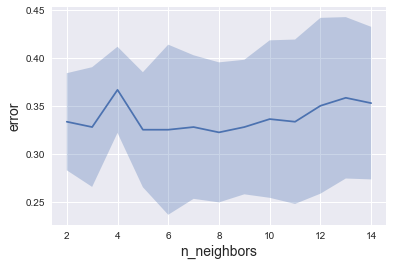

In [7]:
plot_scores(grid_search)

In [8]:
# l1-metcris
classifier = kNN(p=1) 
grid_search = GridSearchCV(classifier, param_grid, scoring = 'accuracy', cv=cv)
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[0 0 ... 2 2], n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [9]:
grid_search.best_params_

{'n_neighbors': 3}

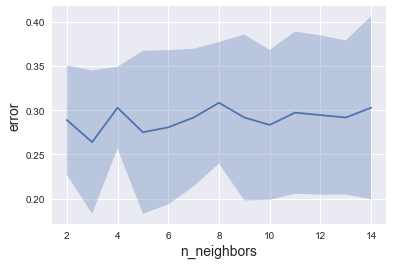

In [10]:
plot_scores(grid_search)

In [11]:
# Chebyshev-metric
classifier = kNN(metric='chebyshev') 
grid_search = GridSearchCV(classifier, param_grid, scoring = 'accuracy', cv=cv)
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(labels=[0 0 ... 2 2], n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [12]:
grid_search.best_params_

{'n_neighbors': 9}

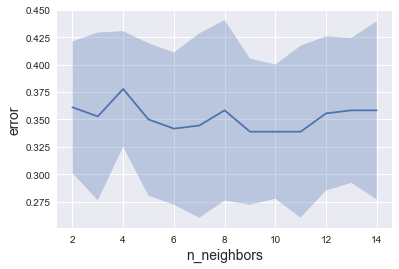

In [13]:
plot_scores(grid_search)

Построим график зависимсоти ошибки и ее среднеквадратичного отклонения от размера выборки в случае метрики l1 и числа соседей = 3.

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split (X, y, test_size = size, random_state=i)